# Исследование о определяющих успех закономерностях в сфере видеоигр



<b>Цели исследования:</b>
 - Определеить,  за какой характерный срок появляются новые и исчезают старые платформы
 - Определить какие платформы лидируют по продажам, какие растут и какие падают
 - Выбрать несколько наиболее потенциально прибыльных платформ
 - Определить как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
 - Изучить возможные закономерности между прибыльностью и жанром игры
 - Составить портрет пользователя каждого региона
 - Проверить гипотезу о равенстве средних пользовательских рейтингов на платформах Xbox One и PC
 - Проверить гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports


<b>План работы:</b>
 1.  Открыть файл с данными и изучить общую информацию
 2. Провести предподготовку данных
     2. Проверить корректность названий столбцов и при необходимости исправить
     2. Преобразовать данные в нужные типы
     2. Обработать пропуски при необходимости
     2. Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец
 3. Провести исследовательский анализ данных
     3. Посмотреть, сколько игр выпускалось в разные годы
     3. Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам
     3. Определить какие платформы лидируют по продажам, растут или падают
     3. Выбрать несколько потенциально прибыльных платформ.
     3. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами
     3. Соотнести выводы с продажами игр на других платформах
     3. Посмотреть на общее распределение игр по жанрам и понять, что можно сказать о самых прибыльных жанрах, выделяются ли жанры с высокими и низкими продажами
 4. Составить портрет пользователя каждого региона
     4. Определить самые популярные платформы (топ-5). Опишисать различия в долях продаж
     4. Определить самые популярные жанры (топ-5) и объяснить разницу
     4. Понять, влияет ли рейтинг ESRB на продажи в отдельном регионе
 5. Проверьте гипотезы
     5. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
     5. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
 6. Написать общий вывод
    


## Открыть файл с данными и изучить общную информацию

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [ ]:
# Открываем данные
try:
    data = pd.read_csv('C:/Users/Student/Desktop/dataset.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [ ]:
# Изучаем общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# Смотрим на первые 5 строчек
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Подвывод

Мы импортировали все библиотеки, которые пригодятся нам в будущем, посмотрели структуру данных (16713 строк и 11 колонок), обнаружили пропуски в колонках critic_score, user_score, rating. В природе их возникновения и как это можно исправить мы разберёмся позже. Обнаружили некорректный формат некоторых данных (year_of_release и user_score), что нам предстоит исправить. Также нам предстоит исправить формат написания столбцов, так как это может помешать нам в дальнейшей работе

## Предобработка данных

### Корректность названий столбцов

In [ ]:
# Получаем список названий всех столбцов
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Для дальнейшей работы с данными нужно привести все названия к общепринятому snake формату (все буквы нижнего регистра)

In [ ]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Теперь названия корректны

### Преобразование данных в нужные типы

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Колонки user_score и year_of_release не соответствуют нужному формату. User_score система воспринимает её как текст, а не число. Исправим это, поменяв их формат. Это происходит из-за того, что некоторые данные записаны как "tbd" (to be defined), это значит, что данных не хватило для оценки. Заменим такие данные на NaN и поменяем тип данных колонки. Для year_of_release заменим тип float на целочисленный формат int.

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
print(data['year_of_release'])
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
print(data['user_score'])

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: Int64
0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64


### Обработка пропусков

In [ ]:
#Смотрим долю пропусков во всём датасете
data.isna().mean().sort_values(ascending=False)

user_score         0.545917
critic_score       0.513192
rating             0.404786
year_of_release    0.016093
name               0.000120
genre              0.000120
platform           0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
dtype: float64

Очень много пропусков в трех колонках: critic_score, rating, user_score, около половины всех данных пропущено. Это может сильно повлиять на наши результаты исследования, поэтому стоит разобраться в причине пропусков и можно ли их заполнить.

#### Пропуски в critic_score

<AxesSubplot:xlabel='na_sales', ylabel='critic_score'>

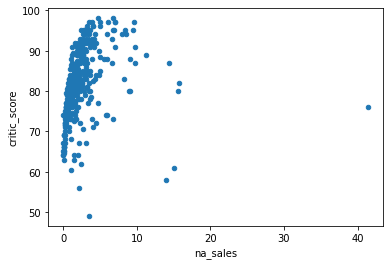

In [ ]:
# Распределение оценки критика в зависимости от количества проданных экземпляров
data.pivot_table(index='na_sales', values='critic_score', aggfunc='median').reset_index().plot(kind='scatter', x='na_sales', y='critic_score')

Из графика не видно никакой закономерности, при любом количестве проданных экземпляров медианы очень сильно скачат

In [ ]:
# Сводная таблица по количеству игр определённого жанра и их медианного критического рейтинга
data.pivot_table(index='genre', values='critic_score', aggfunc=['count', 'median'])

,count,median
,critic_score,critic_score
genre,,
Action,1890,68.0
Adventure,323,66.0
Fighting,409,72.0
Misc,523,69.0
Platform,497,69.0
Puzzle,224,70.0
Racing,742,69.0
Role-Playing,737,74.0


Разброс critic_score по жанрам очень небольшой и количество входящих в категорию оценок достаточно. Но если сделать так, то в каждой категории у нас будет выброс в месте заполненной медианы, так как пропусков у нас очень много, поэтому этот метод нам не подойдёт. Предположительно, ни один из других использованных способов заполнения не подойдёт из-за указанной причины, но стоит это проверить

In [ ]:
#Сводная таблица по количесту игр на конкретную платформу и её медианную критическу оценку в зависимости от жанра
data.pivot_table(index='platform', values='critic_score', aggfunc=['count', 'median'])

,count,median
,critic_score,critic_score
platform,,
2600,0,NaN
3DO,0,NaN
3DS,168,68.0
DC,14,88.0
DS,717,66.0
GB,0,NaN
GBA,438,69.0
GC,448,70.0


При делении по колонке platform, встречаются платформы с маленьким количеством данных. Если заполнять пропуски на основе такого деление, это будет слишком недостоверно, нельзя выставлять оценки всем играм на основе медианы от 14 оценок.

In [ ]:
# Сводная таблица по с количеством выпущенных игр по году и её медианной оценке
data.pivot_table(index='year_of_release', values='critic_score', aggfunc=['count', 'median'])

,count,median
,critic_score,critic_score
year_of_release,,
1980,0,NaN
1981,0,NaN
1982,0,NaN
1983,0,NaN
1984,0,NaN
1985,1,59.0
1986,0,NaN
1987,0,NaN


Как и в случае с платформами, деление по годам не подойдёт из-за данных с маленьким количеством данных, заполнять пропуски по малым количествам данных некорректно.

In [ ]:
# Сколько пропусков оценок критика по платформам
data.query('critic_score.isna()==True').pivot_table(index='platform', aggfunc='count')['eu_sales'].sort_values()

platform
GG         1
PCFX       1
TG16       2
3DO        3
WS         6
SCD        6
NG        12
GEN       29
DC        38
WiiU      57
XOne      78
GB        98
NES       98
XB        99
GC       108
2600     133
PS4      140
SAT      173
SNES     239
PC       259
PSV      310
N64      319
X360     346
3DS      352
GBA      384
PS3      511
Wii      735
PSP      747
PS2      863
PS       997
DS      1434
Name: eu_sales, dtype: int64

Видно, что очень много пропусков приходится не на малоизвестные платформы, а на Nintendo, PS, встречается очень много пропусков у Xbox360 и PS3. Сразу можно заметить, что пропусков у портативных платформ больше, чем у стационарных.

In [ ]:
#Создаем отдельную таблицу, где будут только данные, где пропущен critic_score
critic_score_nan = data.query('critic_score.isna()==True')
critic_score_nan = critic_score_nan.pivot_table(index='year_of_release', values='na_sales', aggfunc='count').reset_index()
critic_score_nan

,year_of_release,na_sales
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,13
6,1986,21
7,1987,16
8,1988,14
9,1989,17


In [ ]:
# Создаём таблицу с количеством данных по каждому году
data_for_share = data.pivot_table(index='year_of_release', aggfunc='count')['na_sales'].reset_index()
data_for_share

,year_of_release,na_sales
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [ ]:
# Объединяем 2 предыдущие таблицы в одну и находим долю пропущенных данных для каждого года
data_for_share = data_for_share.merge(critic_score_nan, on='year_of_release')
data_for_share['ratio'] = data_for_share['na_sales_y']/data_for_share['na_sales_x']
data_for_share

,year_of_release,na_sales_x,na_sales_y,ratio
0,1980,9,9,1.000000
1,1981,46,46,1.000000
2,1982,36,36,1.000000
3,1983,17,17,1.000000
4,1984,14,14,1.000000
5,1985,14,13,0.928571
6,1986,21,21,1.000000
7,1987,16,16,1.000000
8,1988,15,14,0.933333
9,1989,17,17,1.000000


<AxesSubplot:title={'center':'Доля пропущенных данных колонки critics_score'}, xlabel='year_of_release'>

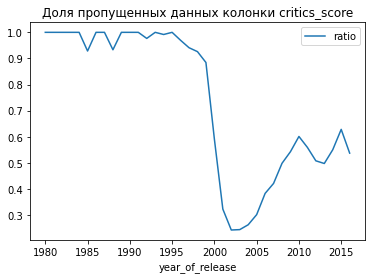

In [ ]:
# Строим таблицу по доле пропущенных данных для каждого года для колонки critics_score
data_for_share.plot(x='year_of_release', y='ratio', title='Доля пропущенных данных колонки critics_score')

До 2000 года доля пропусков в колонке critics_score равна 100%, но с 2000 года эта доля резко упала до 60% и на протяжение следующих 4 лет неуклонно снижалась. С 2005 года эта доля снова начала расти и начала колебаться примерно около уровня ~50%. Эти данные могут дать нам подсказку о природе возникновения пропусков. в 2004 году вышла Нинтендо DS (на долю которой приходится очень много пропусков). В 2005 также вышла PSP, у которой тоже очень много пропусков, то есть одной из причин увеличивающейся доли пропусков -- это выход новых платформ, при чём на портативные платформы пропусков больше, чем на стационарные. Видимо критики не успевают писать обзоры на иггры всех платформ, а их количество увеличивается, вот и доля пропусков тоже растёт. В таком случае характер пропусков будет MAR (случайный), так как он зависит от других колонок но не зависит от самого характера вопроса и той же колонки (critic_score).

Количество пропусков в данной колонке больше 50%, очевидного способа заполнить эти пропуски нет, значит лучше оставить пропуски пропусками, иначе мы рискуем исказить данные, а это может быть причиной плохой репрезентативности в будущем анализе.

#### Пропуски в user_score

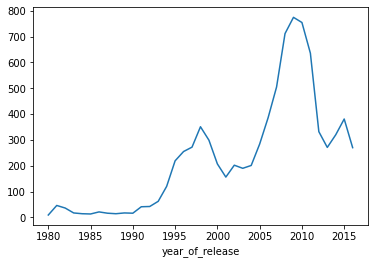

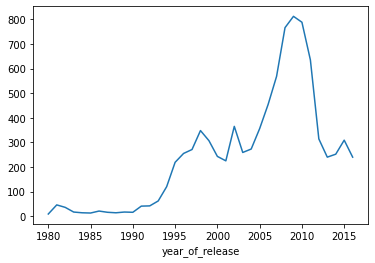

In [ ]:
# Распределение количества строчек по годам с пропущенными оценками критиков
data.query('critic_score.isna()==True').pivot_table(index='year_of_release', aggfunc='count')['eu_sales'].plot()
plt.show()
# Распределение количества строчек по годам с пропущенными оценками игроков
data.query('user_score.isna()==True').pivot_table(index='year_of_release', aggfunc='count')['eu_sales'].plot()
plt.show()

Можем видеть идентичный рисунок графика, приирода возникновения пропусков одинакова. Доля пропусков в этой колонке больше 40%, и при условии что заполнить эти пропуски очевидным образов никак нельзя, в результате заполнения медианой или средней мы получим большие выбросы, что исказит результаты нашего будущего анализа. Оставляем пропуски -- пропусками

#### Пропуски в rating

<AxesSubplot:xlabel='year_of_release'>

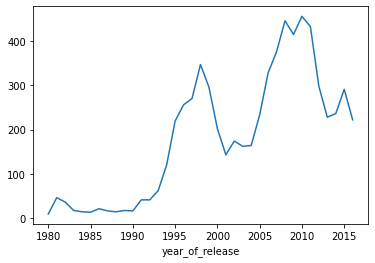

In [ ]:
data.query('rating.isna()==True').pivot_table(index='year_of_release', aggfunc='count')['eu_sales'].plot()

In [ ]:
data['rating'] = data['rating'].fillna('-1')
data['rating'].isna().sum()

0

Мы можем видеть, что пропуск в колонке critic_score означает, что пропуск также будет и в rating, и в user_score. Также мы могли заметить, что график пропусков в rating в точности имитирует график пропусков в user_score и очень похож на critic_score, значит природа пропусков этих двух колонкой одна и та же. К тому же rating является категориальной переменной, и заполнить её ещё сложнее, а так как заполнить эти пропуски невозможно, заполним их значениями-заглушкой, чтобы дальше в анализе мы смогли использовать все данные

#### Суммарные продажи во всех регионах

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,-1
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,-1


In [ ]:
#Добавляем колонку
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,-1,31.38


#### Подвывод заполнения пропусков

Мы посмотрели на долю пропусков в столбцах, выяснили их природу и приняли решение их не заполнять, в силу их количества (заполнение приведёт к искажению данных) и отсутсвия очевидного способа их заполнения. Также мы добавили дополнительную колонку в таблцу, где посчитаны суммарные продажи во всех регионах.

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

<AxesSubplot:title={'center':'Продажи по годам выпуска'}, xlabel='year_of_release'>

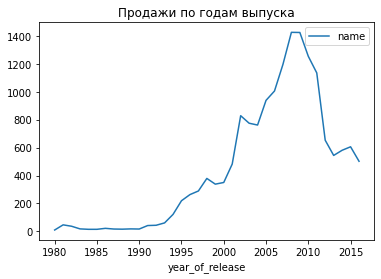

In [ ]:
# График по суммарным продажам по всем годам
data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index().plot(x='year_of_release', y='name', title='Продажи по годам выпуска')

<AxesSubplot:title={'center':'Продажи по годам выпуска с 2006 года'}, xlabel='year_of_release'>

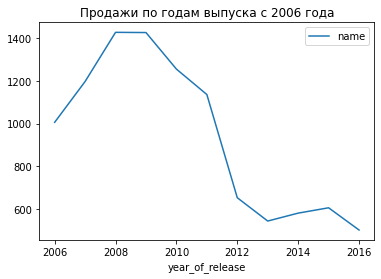

In [ ]:
# График по суммарным продажам по годам с 2006 года
data_2006 = data.query('year_of_release > 2005')
data_2006.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index().plot(x='year_of_release', y='name', title='Продажи по годам выпуска с 2006 года')

С 1980 года идёт плавный рост выпущенных игр, с 2001 года этот рост значительно ускоряется и достигает пика в 2008 году, после чего начался резкий спад количества выпущенных игр. Это можно связать с экономеческим кризисов в США в 2008 году: многие компании его не пережили, и количество выпущеных игр с тех пор снизилось. Ещё одной причиной подобно может быть повышение сложности и дороговизны создания игр: графика становится лучше, физика становится более сложной и всё это требует бОльших ресурсов.

Параметры, которые были актуальны для 1980 года, уже не будут актуальны для игр последних ~8 лет, так как игроиндустрия развивается очень быстро, но точный актуальный период мы узнаем позже.

###  Как менялись продажи по платформам

In [ ]:
# Создаём отдельный список с платформами с самыми большими продажами
top_platform_sales = data.pivot_table(index='platform',
                      values='total_sales',
                      aggfunc='sum').sort_values(by='total_sales').query('total_sales > 300').reset_index()['platform']
top_platform_sales

0     PS4
1     GBA
2      PS
3      DS
4     Wii
5     PS3
6    X360
7     PS2
Name: platform, dtype: object

<AxesSubplot:title={'center':'Распределение продаж по платформам с самыми большими продажами по годам'}, xlabel='year_of_release'>

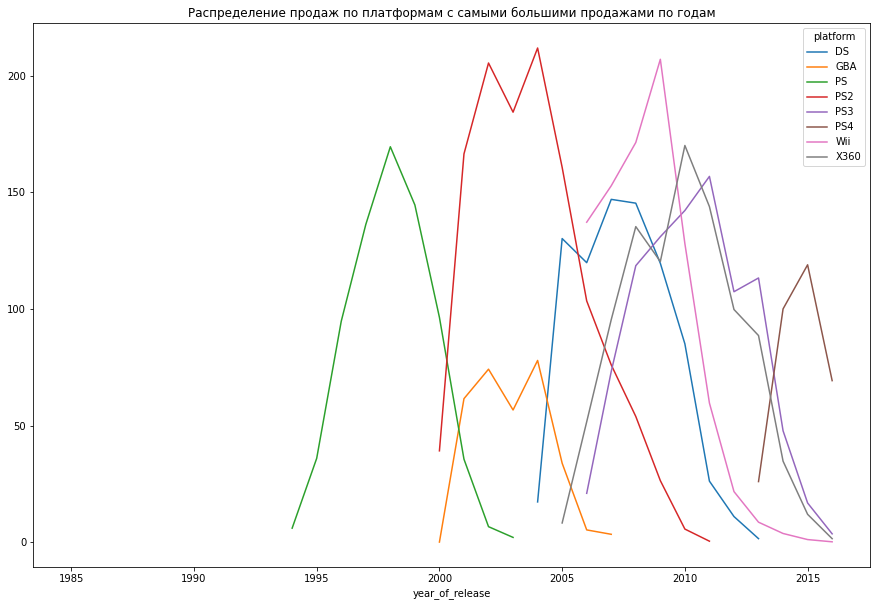

In [ ]:
# Распределение продаж по платформам с самыми большими продажами по годам
data.query('platform in @top_platform_sales').pivot_table(index='year_of_release',
                                                                 columns='platform', values='total_sales',
                                                                 aggfunc='sum').plot(figsize=(15, 10), title='Распределение продаж по платформам с самыми большими продажами по годам')

Для всех платформ виден один и тот же паттерн: при выходе новой платформы, количество проданных на неё игр начинает резко расти, через 5 лет достигает пика и начинает ещё более резкое снижение. Примерное "время жизни" каждой платформы 10 лет, далее продажи по играм на неё уже находятся на очень низком уровне и вовсе исчезают. Новые популярные платформы появляются примерно каждые 6 лет. Актуальным периодом мы будем считать продажи с 2014 года, так как 2017 год около 5-летнего пика нового поколения консолей, а учитывая срок разработки игр, если взять срок более ранний, то прогрозы станут уже неактуальны

### Платформы-лидеры по продажам за актуальный период

Продажи на платформу растут на протяжении 5 лет после её выпуска, после продажи начинают падать, значит нужно брать в расчет самые новые платформы, которые вышли совсем недавно, платформы которые ещё не перешли свой пик -- это платформы моложе 5 лет, а также те, которые только собираются выйти

In [ ]:
# Сводная таблица по общим продажам последних 3 лет по платформам
top_platform_sales_actual = data.query('year_of_release >= 2014').\
                                        pivot_table(index='platform',
                                                    columns='year_of_release',
                                                    values='total_sales',
                                                    aggfunc='sum').reset_index()
top_platform_sales_actual

year_of_release,platform,2014,2015,2016
0,3DS,43.76,27.78,15.14
1,PC,13.28,8.52,5.25
2,PS3,47.76,16.82,3.60
3,PS4,100.00,118.90,69.25
4,PSP,0.24,0.12,NaN
5,PSV,11.90,6.25,4.25
6,Wii,3.75,1.14,0.18
7,WiiU,22.03,16.35,4.60
8,X360,34.74,11.96,1.52
9,XOne,54.07,60.14,26.15


<AxesSubplot:xlabel='platform'>

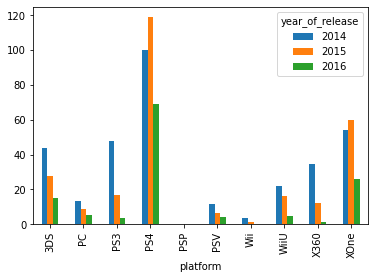

In [ ]:
top_platform_sales_actual.groupby('platform').agg('sum').plot(kind='bar')

Из имеющихся данных, стоит делать ставку на следующие платформы:
 - PS4
 - Xbox One

Но стоит учитывать, что продажи этих платформ и дальше будут снижаться, тем не менее лучших альтернатив среди существующих платформ нет. Стоит обратить пристальное внимание на ещё не вышедшие платформы. Исходя из того, как часто новые платформы выходили раньше, стоит ждать новое поколение консолей к 2020 году, именно на них нужно сделать основной акцент. С высокой вероятностью это будут консоли Xbox и Playstation, так как они были лидерами в предыдущих временных периодах.

### Глобальные продажи игр в разбивке по платформам

Text(0.5, 1.0, 'Продажи по всем регионам по каждой платформе')

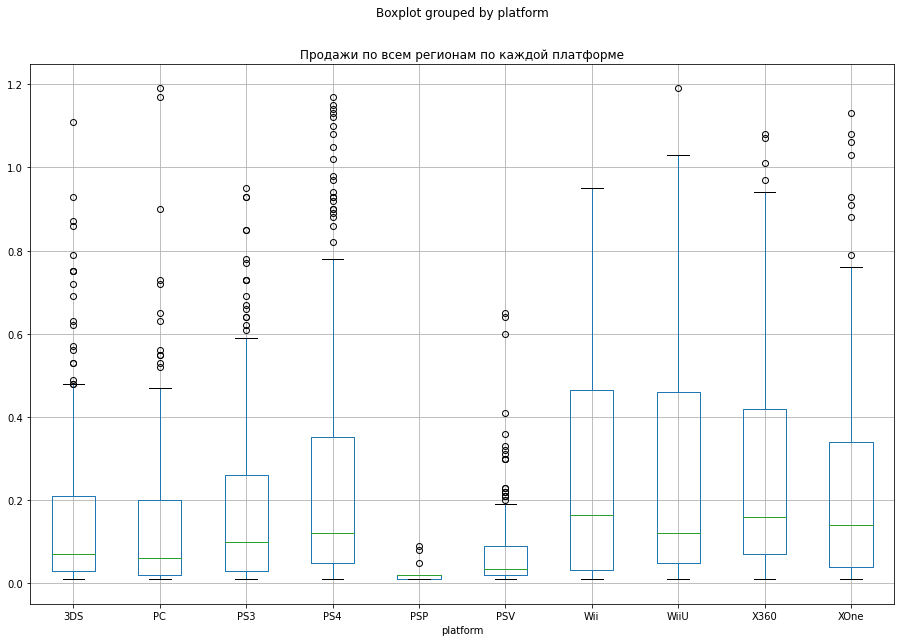

In [ ]:
# Строим ящик с усами по играм для "живых" платформ
data.query('total_sales < 1.2 and platform in @top_platform_sales_actual.platform and year_of_release >= 2014').\
                                                           boxplot(column='total_sales',
                                                                   by='platform',
                                                                   figsize=(15, 10))
plt.title('Продажи по всем регионам по каждой платформе')

Во всех платфомах мы можем видеть большое количество выбросов, их величина была настолько большая, что для того, чтобы сделать график читабельным, пришлось ограничить его сверху 1.5 миллионами продаж, так как они находятся за 1.5х от межквартильного размаха (верхнего уса), а медианы каждой платформы не стремятся к верхнему усу, значит такие значения редки и ими можно пожертвовать.

Согласно распределению, наиболее финансово привлекательными выглядят:
 - WiiU
 - Wii
 - X360
 - PS4
 - XOne
 - PS3

У Wii и WiiU самые высокие показатели продаж, медианное значение примерно 0.18 миллионов проданных экземпляров. Датасет скошен вправо, значит это платформа имеет много игр с продажами до 0.45 миллионов экз. Нижний уровень ящика находится примерно на том же уровне с другими вышеуказанными платформами. Близжайший конкурент Wii -- это Xbox 360. Медианное значение то же, но скошенность вправо меньше, значит у этой платформы меньше продаж выше медианны. Оставшиеся платформы менее конкуретноспособны, однако стоит принимать во внимание, что причина такого графика в том, что PS3 находится уже на закате, а PS4 и Xbox One платформы новые, и их продажи будут ещё на высоком уровне, Wii и WiiU же свои позиции будет сдавать, как и PS3.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

#### Для PS3

<AxesSubplot:title={'center':'PS3 и общие продажи'}, xlabel='user_score', ylabel='total_sales'>

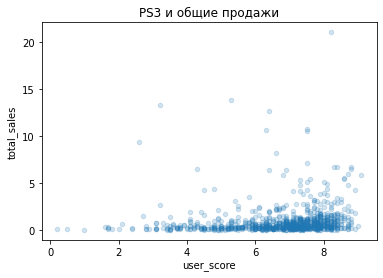

In [ ]:
data.query('platform == "PS3"').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.2, title='PS3 и общие продажи')

In [ ]:
data.query('platform == "PS3"')['user_score'].corr(data.query('platform == "PS3"')['total_sales'])

0.12669133936341692

Корреляция между оценками пользователей и количеством продаж есть, но очень слабая

<AxesSubplot:title={'center':'PS3 и оценки критиков'}, xlabel='critic_score', ylabel='total_sales'>

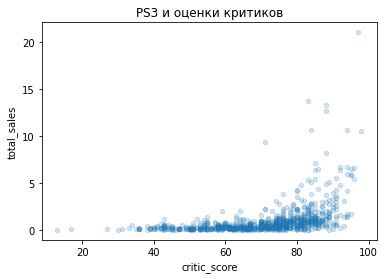

In [ ]:
data.query('platform == "PS3"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.2, title='PS3 и оценки критиков')

In [ ]:
data.query('platform == "PS3"')['critic_score'].corr(data.query('platform == "PS3"')['total_sales'])

0.43243156856420634

А вот корреляция между оценками критиков и продажами значительно сильнее, значит для продаж оценки критиков важнее, чем оценки пользователей.

#### Для всех остальных платформ

3DS 0.22480798039571082
PC 0.01047568462148642
PS3 0.12669133936341692
PS4 -0.031957110204556376
PSP 0.21926403662980337
PSV 0.013579522883028902
Wii 0.11241436067003163
WiiU 0.4002190202148617
X360 0.11445882978454186
XOne -0.06892505328279414


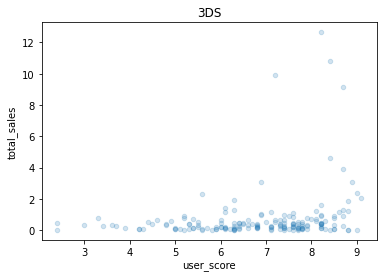

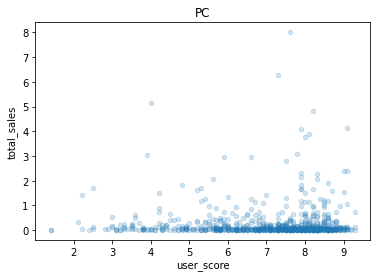

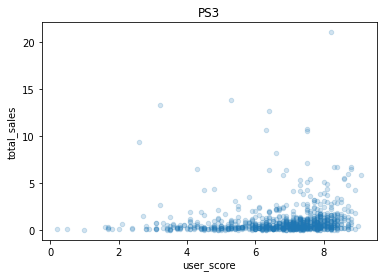

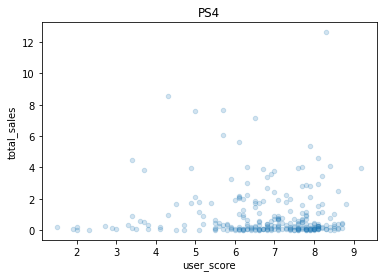

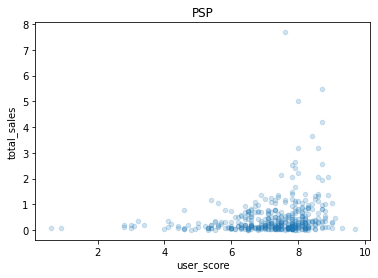

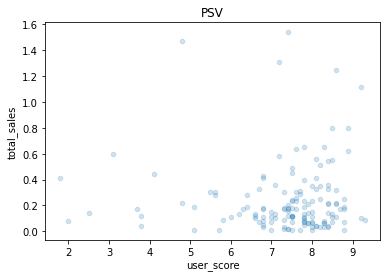

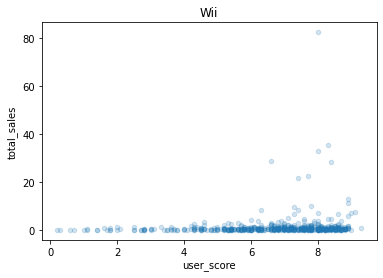

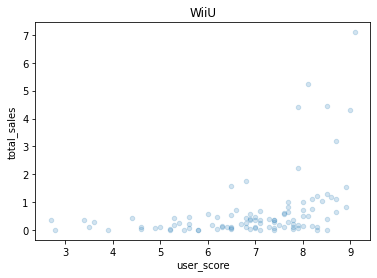

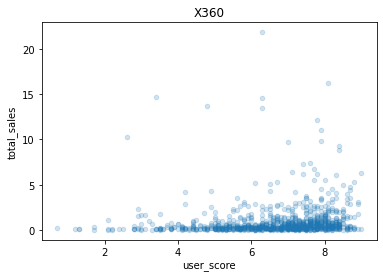

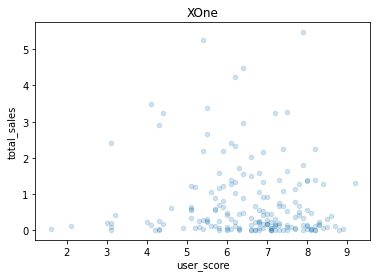

In [ ]:
#Корреляция между оценками пользователей и продажами
for name, group_data in data.query('platform in @top_platform_sales_actual.platform').\
    groupby('platform'):
    group_data.plot(title=name, kind='scatter', x='user_score', y='total_sales', alpha=0.2)
    print(name, group_data['user_score'].corr(group_data['total_sales']))

3DS 0.3494009303924131
PC 0.25688673789482114
PS3 0.43243156856420634
PS4 0.40656790206178095
PSP 0.31677456049545616
PSV 0.1315167215429264
Wii 0.17755988806089956
WiiU 0.34837976012017485
X360 0.3937358653072584
XOne 0.4169983280084017


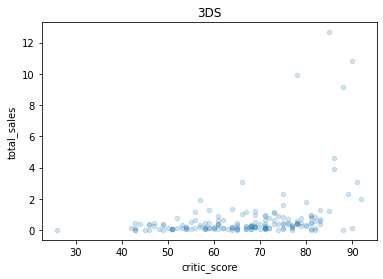

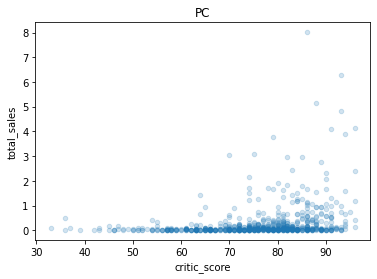

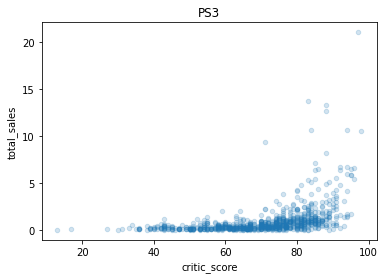

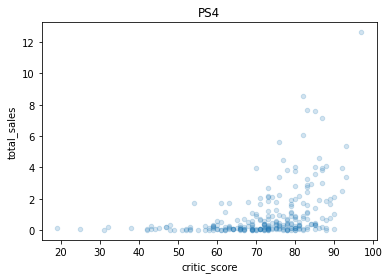

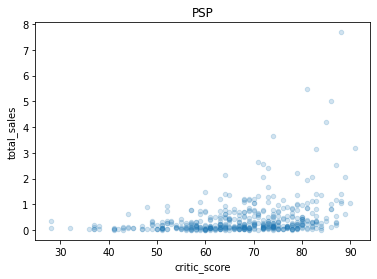

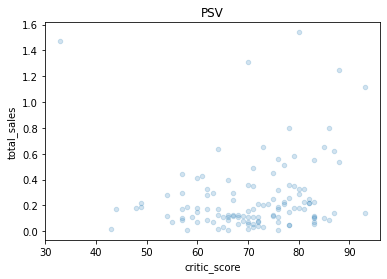

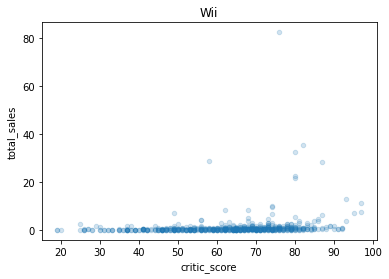

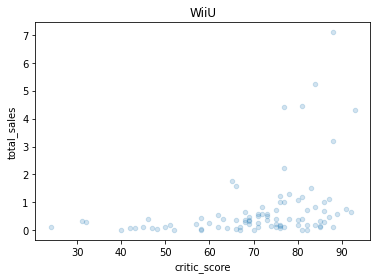

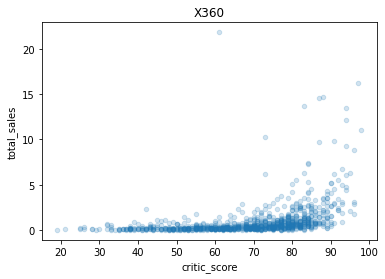

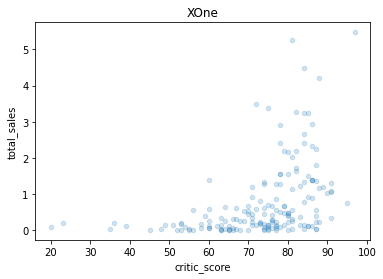

In [ ]:
#Корреляция между оценками критиков и продажами
for name, group_data in data.query('platform in @top_platform_sales_actual.platform').\
    groupby('platform'):
    group_data.plot(title=name, kind='scatter', x='critic_score', y='total_sales', alpha=0.2)
    print(name, group_data['critic_score'].corr(group_data['total_sales']))

Выяснилось, что для платформ 3DS и WiiU корреляция между <b>оценками пользователей</b> и продажами выше, чем у PS3, 0.22 и 0.4 соответственно, по остальным платформам корреляция низкая. Картина корреляции <b>оценки критиков</b> и продаж другая: она высокая для всех платформ без исключения, наиболее высокая корреляция прослеживается для PS4 (0.41), Xbox One(0.42) и Xbox 360 (0.4).

Резюмируя, для <b>любой</b> платформы для высоких продаж следует иметь хорошие отзывы критиков, и <b>только</b> для пользователей WiiU и 3DS важны отзывы других игроков.

### Общее распределение игр по жанрам

<AxesSubplot:title={'center':'Медианное распределение продаж по жанрам'}, xlabel='genre'>

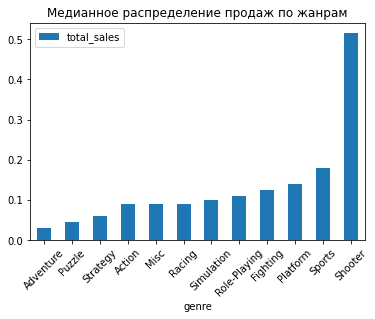

In [ ]:
#Строим график по распределениям продаж по жанрам для актуальных платформ
data.query('platform in @top_platform_sales_actual.platform and year_of_release >= 2014').\
    pivot_table(index='genre', values='total_sales', aggfunc='median').\
    sort_values(by='total_sales').\
    plot(kind='bar', rot=45, title='Медианное распределение продаж по жанрам')

Самыми продаваемыми жанрами на актуальный период являются:
 - Shooter
 - Sports
 - Platform
 - Fighting
 - Role-Playing

Самыми плохопродаваемыми жанрами являются:
 - Adventure
 - Puzzle
 - Strategy
 - Action

### Подвывод


Мы провели исследовательский анализ данных и выяснили:
 - Сколько игр выпускалось в разные годы
 - За какой период появляются новые и исчезают старые платформы
 - Какие года можно считать актуальным периодом
 - Как менялись игры продажи по платформам в зависимости от оценок пользователей и критиков
 - Наиболее перспективные платформы
 - Какие жанры являются самыми продаваемыми сейчас

## Портрет каждого региона

### Самые популярные платформы (топ-5)

#### Европейский регион

<AxesSubplot:title={'center':'Топ-5 платформ для Европы'}, xlabel='platform'>

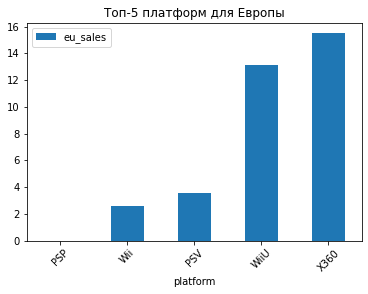

In [ ]:
data.query('year_of_release >= 2014').\
    pivot_table(index='platform', values='eu_sales', aggfunc='sum').\
    sort_values(by='eu_sales').\
    head().\
    plot(kind='bar', rot=45, title='Топ-5 платформ для Европы')

Самыми популярными платформами для Европы являются:
 - Xbox 360
 - WiiU
 - PSV
 - Wii

 При чём WiiU и Xbox 360 сильно опережают своих конкурентов

#### Североамериканский регион

<AxesSubplot:title={'center':'Топ-5 платформ для Северной Америки'}, xlabel='platform'>

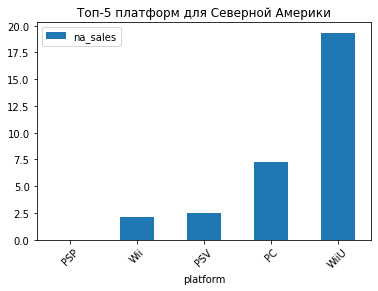

In [ ]:
data.query('year_of_release >= 2014').\
    pivot_table(index='platform', values='na_sales', aggfunc='sum').\
    sort_values(by='na_sales').\
    head().\
    plot(kind='bar', rot=45, title='Топ-5 платформ для Северной Америки')

Самыми популярными платформами для Америки являются:
 - WiiU
 - PC
 - PSV
 - Wii

 В Американском регионе в топ лидеров вышли игры на персональные компьютеры, а самой популярной платформой оказалась WiiU, Xbox 360 в рейтинге не оказался

#### Японский регион

<AxesSubplot:title={'center':'Топ-5 платформ для Японии'}, xlabel='platform'>

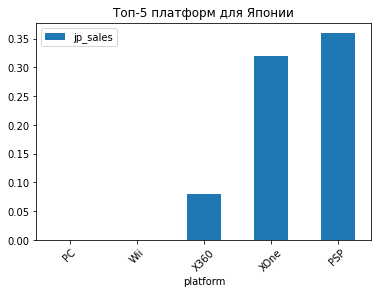

In [ ]:
data.query('year_of_release >= 2014').\
    pivot_table(index='platform', values='jp_sales', aggfunc='sum').\
    sort_values(by='jp_sales').\
    head().\
    plot(kind='bar', rot=45, title='Топ-5 платформ для Японии')

Самыми популярными платформами для Японии являются:
 - PSP
 - Xbox One
 - Xbox 360

Самая популярная платформа для Японии -- PSP (а не её конкурент PSV), она не была в топ-рейтингах ни Америки, ни Европы. Также в топ попали обе версии Xbox.

### Самые популярные жанры (топ-5)

#### Самые популярные жанры Европы

<AxesSubplot:title={'center':'Топ-5 жанров для Европы'}, xlabel='genre'>

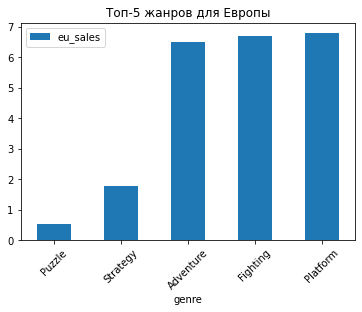

In [ ]:
data.query('year_of_release >= 2014').\
    pivot_table(index='genre', values='eu_sales', aggfunc='sum').\
    sort_values(by='eu_sales').\
    head().\
    plot(kind='bar', rot=45, title='Топ-5 жанров для Европы')

Самые популярные жанры Европы:
 - Platform
 - Fighting
 - Adventure
 - Strategy
 - Puzzle

 Несмотря на то, что на графике общих продаж по жанрам Strategy и Puzzle были в самом конце, в европейском регионе на них приходится большая часть продаж игр

#### Самые популярные жанры Северной Америки

<AxesSubplot:title={'center':'Топ-5 жанров для Америки'}, xlabel='genre'>

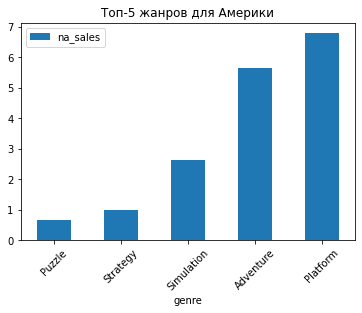

In [ ]:
data.query('year_of_release >= 2014').\
    pivot_table(index='genre', values='na_sales', aggfunc='sum').\
    sort_values(by='na_sales').\
    head().\
    plot(kind='bar', rot=45, title='Топ-5 жанров для Америки')

Самые популярные жанры Америки:

 - Platform
 - Adventure
 - Simulation
 - Strategy
 - Puzzle

Интересы американских игроков по большей части повторяют интересы игроков в Европе, единственная разница, из топа ушёл жанр Fighting, а на его место пришёл Simulation

#### Самые популярные жанры Японии

<AxesSubplot:title={'center':'Топ-5 жанров для Японии'}, xlabel='genre'>

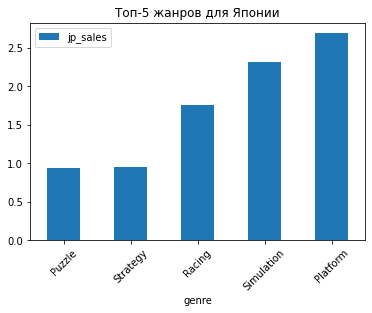

In [ ]:
data.query('year_of_release >= 2014').\
    pivot_table(index='genre', values='jp_sales', aggfunc='sum').\
    sort_values(by='jp_sales').\
    head().\
    plot(kind='bar', rot=45, title='Топ-5 жанров для Японии')

Самые популярные жанры Японии:
 - Platform
 - Simulation
 - Racing
 - Strategy
 - Puzzle

В отличие от других регионов, в японском топе появился жанр Racing, он занимает 3-е место. Остальные жанры те же.

Самыми потенциально успешными и подходящими под все регионы жанрами будут Platform, Strategy и Pazzle. Если наша целевая аудитория Европа, стоит также рассмотреть Fighting и Adventure, если Америка: Simulation и Adventure, если Япония: Simulation и Racing.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе

In [ ]:
data.query('rating == -1')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


#### Рейтинги и продажи игр в Европе

<AxesSubplot:title={'center':'Рейтинги и продажи игр в Европе'}, xlabel='rating'>

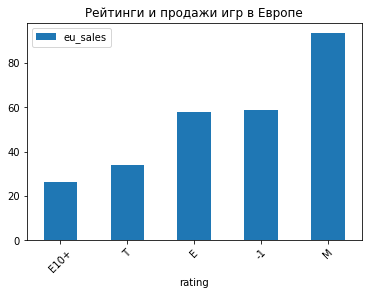

In [ ]:
data.query('year_of_release >= 2014').\
    pivot_table(index='rating', values='eu_sales', aggfunc='sum').\
    sort_values(by='eu_sales').\
    head().\
    plot(kind='bar', rot=45, title='Рейтинги и продажи игр в Европе')

Большая часть продаж игр в Европе приходится на рейтинг Mature(18+) и на треть менее популярный Everyone (все возрасты)

#### Рейтинги и продажи игр в Северной Америке

<AxesSubplot:title={'center':'Рейтинги и продажи игр в Америке'}, xlabel='rating'>

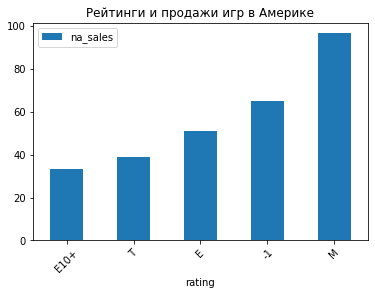

In [ ]:
data.query('year_of_release >= 2014').\
    pivot_table(index='rating', values='na_sales', aggfunc='sum').\
    sort_values(by='na_sales').\
    head().\
    plot(kind='bar', rot=45, title='Рейтинги и продажи игр в Америке')

Точно та же картина, что и для Европы, мы можем видеть в продажах в Северной Америке, самые популярные игры с рейтингом Mature(18+) и вдвое менее популярным Everyone (все возрасты)

#### Рейтинги и продажи игр в Японии

<AxesSubplot:title={'center':'Рейтинги и продажи игр в Японии'}, xlabel='rating'>

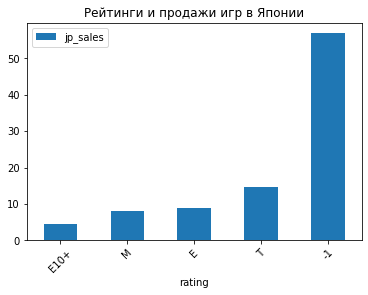

In [ ]:
data.query('year_of_release >= 2014').\
    pivot_table(index='rating', values='jp_sales', aggfunc='sum').\
    sort_values(by='jp_sales').\
    head().\
    plot(kind='bar', rot=45, title='Рейтинги и продажи игр в Японии')

Японские рынок отличается от европейского и американского, здесь на первое место выходят игры без рейтинга, при чём находятся в огромном отрыве. Это связано с тем, что ESRB система создавалась для игр Европы и Америки, они не оценивают японские игры, у Японцев своя система, которой нет в данных. Из европейский/американских игр самыми популярным рейтингом оказался Teen (13+),но рейтинги Everyone и Mature примерно ему равны.

Итого, самой стабильной стратегией будет создание игры рейтинга М, так как она будет в неконкурентном преимуществе на фоне игр других рейтингов в Европе и Америке, и будет занимать ту же долю рынка в Японии, что и игры рейтинга T (что занимают второе место в Японии по продаваемости). Если нашей целевой аудиторией будут только японские игроки, следует получить дополнительные данные с рейтинговой системой в Японии, сейчас мы никаких выводов сделать не можем.

### Подвывод

В этой части исследования мы выяснили:
 - Игры на каких платформах самые популярные для всех регионов
 - Игры с каким жанрами самые популярные для всех регионов
 - Игры с каким возрастным рейтингом самые продаваемые в каждом регионе

## Статистический анализ

### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Чаще всего критерий Стьюдента применяется для проверки равенства средних значений в двух выборках. Как раз наша задача, поэтому мы его и используем

```
H0: Средние пользовательские рейтинги платформы Xbox One = Средние пользовательские рейтинги платформы PC

Ha: Средние пользовательские рейтинги платформы Xbox One ≠ Средние пользовательские рейтинги платформы PC

alpha = 0.05

Критерий Стьюдента (У нас достаточно данных, чтобы выборочная средняя была распределена нормально)

Метод ttest_ind, так как гипотеза о равенстве средних двух ген. совокупностей

```

In [ ]:
# вызов метода для проверки гипотезы
results = st.ttest_ind(data.query('platform == "PC"')['user_score'],
                      data.query('platform == "XOne"')['user_score'], equal_var=False, nan_policy='omit')

# Значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.935072360183565e-06
Отвергаем нулевую гипотезу


У нас есть достаточно оснований, чтобы отвергнуть нулевую гипотезу и сказать, что средние пользовательские рейтинги на Xbox One отличаются от средних пользовательских рейтингов на PC

### Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные

```
H0: Средние пользовательские рейтинги жанра Action = Средние пользовательские рейтинги жанра Sports

Ha: Средние пользовательские рейтинги жанра Action ≠ Средние пользовательские рейтинги жанра Sports

alpha = 0.05

Критерий Стьюдента (У нас достаточно данных, чтобы выборочная средняя была распределена нормально)

Метод ttest_ind, так как гипотеза о равенстве средних двух ген. совокупностей

```

In [ ]:
# вызов метода для проверки гипотезы
results = st.ttest_ind(data.query('genre == "Action"')['user_score'],
                      data.query('genre == "Sports"')['user_score'], equal_var=True, nan_policy='omit')

# Значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.1040695135904947
Не получилось отвергнуть нулевую гипотезу


У нас нет достаточных оснований, чтобы отвергнуть нулевую гипотезу о неравенстве пользователских рейтингов жанра Action и Sports

### Подвывод

Мы провели статистические тесты и выяснили:
 - Мы не можем отвергнуть гипотзу о равенстве пользователских рейтингов жанра Action и Sports
 - У нас достаточно оснований, чтоб отвергнуть гипотезу о равенстве гипотезу о равенстве ср. пользователских рейтингов для Xbox One и PC

## Общий вывод

Мы провели предподготовку данных: исправили названия слобцов, изменили где необходимо тип данных, выяснили природу пропусков и приняли решение их не заполнять, так как это могло привести к искажённым результатам при анализе, после этого мы провели исследовательский и статистический анализы. В ходе исследования выяснилось:


 - Игровая индустрия начала падать начиная с 2008 года, причинами послужили экономический кризис в США и усложение процесса создания самых игр (продвинутая графика и физика), а также их дороговизна.

 - При выходе новой платформы, количество проданных на неё игр начинает резко расти, через 5 лет достигает пика и начинает ещё более резкое снижение. Примерное "время жизни" каждой платформы 10 лет, далее продажи по играм на неё уже находятся на очень низком уровне и вовсе исчезают.

 - Стоит сделать ставку на PS4 и Xbox One, но стоит учитывать, что продажи этих платформ будут снижаться, тем не менее лучших альтернатив среди существующих платформ нет. Стоит обратить пристальное внимание на ещё не вышедшие платформы. Исходя из того, как часто новые платформы выходили раньше, стоит ждать новое поколение консолей к 2020 году, именно на них нужно сделать основной акцент.

 - У Wii и WiiU самые высокие показатели продаж, медианное значение примерно 0.18 миллионов проданных экземпляров. Оставшиеся платформы менее конкуретноспособны, однако стоит принимать во внимание, что причина таких результатов в том, что PS3 находится уже на закате, а PS4 и Xbox One платформы новые, и их продажи будут ещё на высоком уровне, Wii и WiiU же свои позиции будет сдавать, как и PS3.

 - Для любой платформы для высоких продаж следует иметь хорошие отзывы критиков, и только для пользователей WiiU и 3DS важны отзывы других игроков.

 - Самые популярные платформы
  - Европы: Xbox360 WiiU PSV Wii
  - Америки: WiiU PC PSV Wii
  - Японии: PSP XboxOne Xbox360
  
 - Самыми потенциально успешными и подходящими под все регионы жанрами будут Platform, Strategy и Pazzle. Если наша целевая аудитория Европа, стоит также рассмотреть Fighting и Adventure, если Америка: Simulation и Adventure, если Япония: Simulation и Racing.

 - Самой стабильной стратегией будет создание игры рейтинга М, так как она будет в неконкурентном преимуществе на фоне игр других рейтингов в Европе и Америке, и будет занимать ту же долю рынка в Японии, что и игры рейтинга T (которые занимают второе место в Японии по продаваемости). Если нашей целевой аудиторией будут только японские игроки, следует получить дополнительные данные с рейтинговой системой в Японии, сейчас мы никаких выводов сделать не можем.

 - Мы не можем отвергнуть гипотзу о равенстве пользователских рейтингов жанра Action и Sports

 - У нас достаточно оснований, чтоб отвергнуть гипотезу о равенстве гипотезу о равенстве ср. пользователских рейтингов для Xbox One и PC